# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Sipa02/BMLP_submission/main/bank_transactions_data_2.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. Memahami Struktur Data

In [3]:
# melihat struktur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

- Dataset terdiri dari 2512 baris dan 16 fitur
- Perlu merubah tipe data pada kolom TransactionDate dan PreviousTransactionDate menjadi datetime

2. Mengecek missing value dan duplikat

In [ ]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [ ]:
df.duplicated().sum()

0

Tidak ada data yang kosong dan data duplikat

3. Analisa Distribusi dan Korelasi

In [ ]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


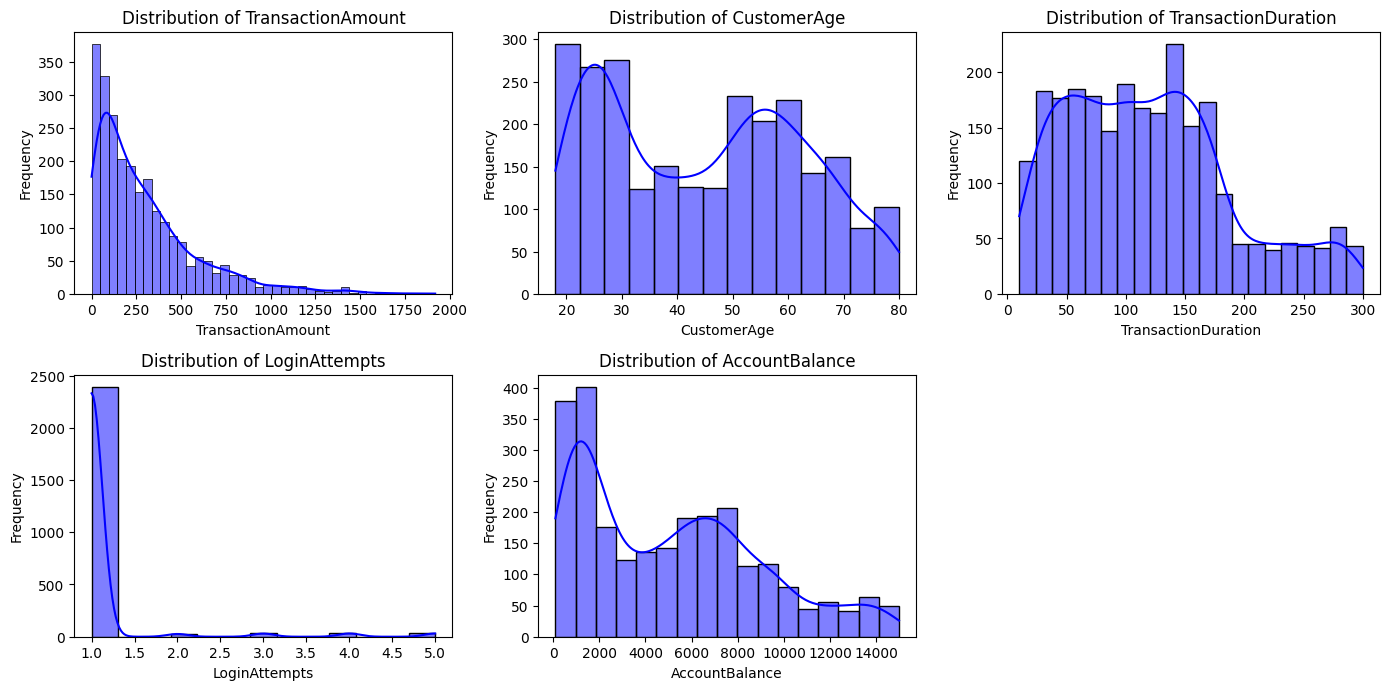

In [4]:
# distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

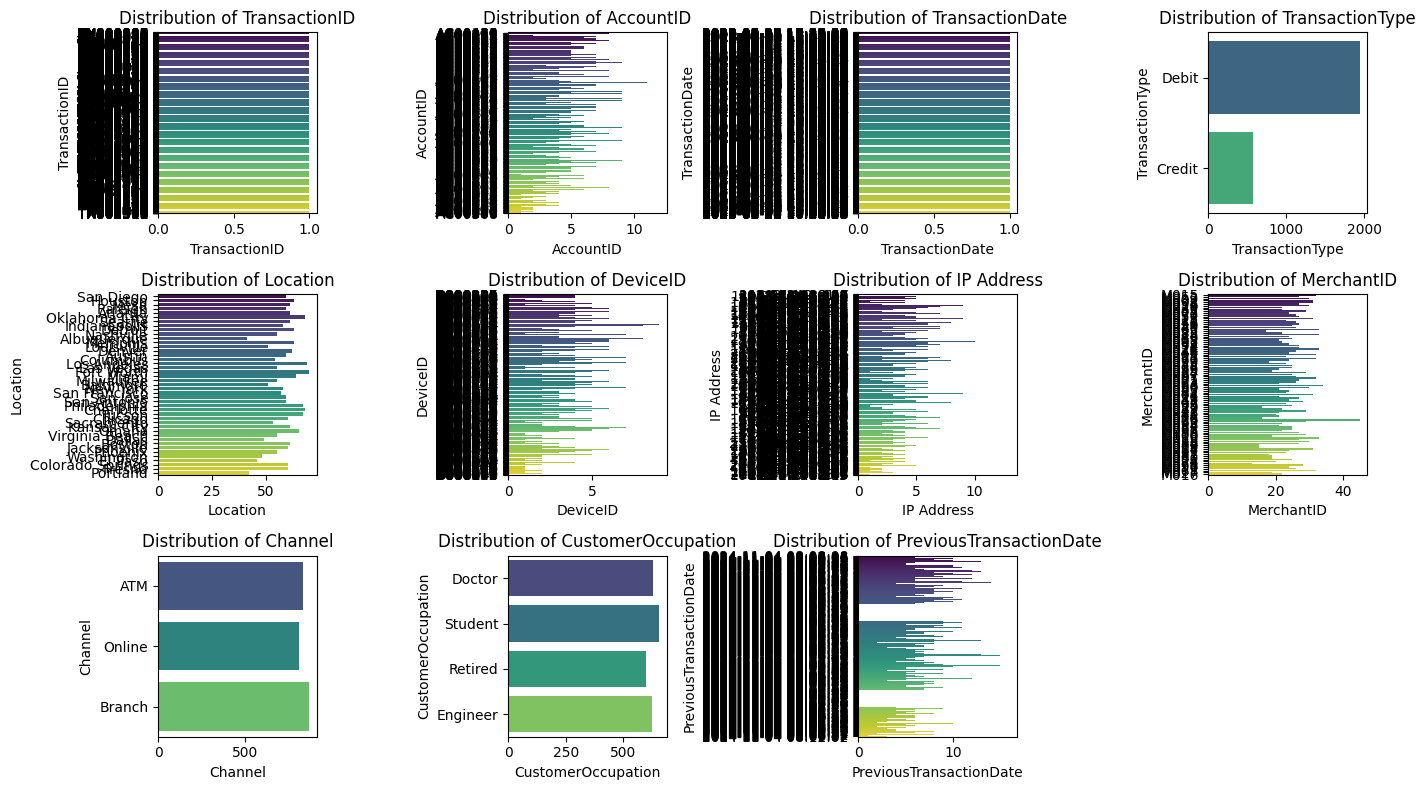

In [ ]:
# distribusi fitur kategorikal
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))

# Adjust the subplot grid to accommodate all features
num_cols = len(cat_features.columns)
num_rows = (num_cols + 3) // 4

for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(num_rows, 4, i)  # Use calculated rows and 4 columns
    sns.countplot(y=df[column], hue=df[column], palette='viridis', legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)


plt.tight_layout()
plt.show()

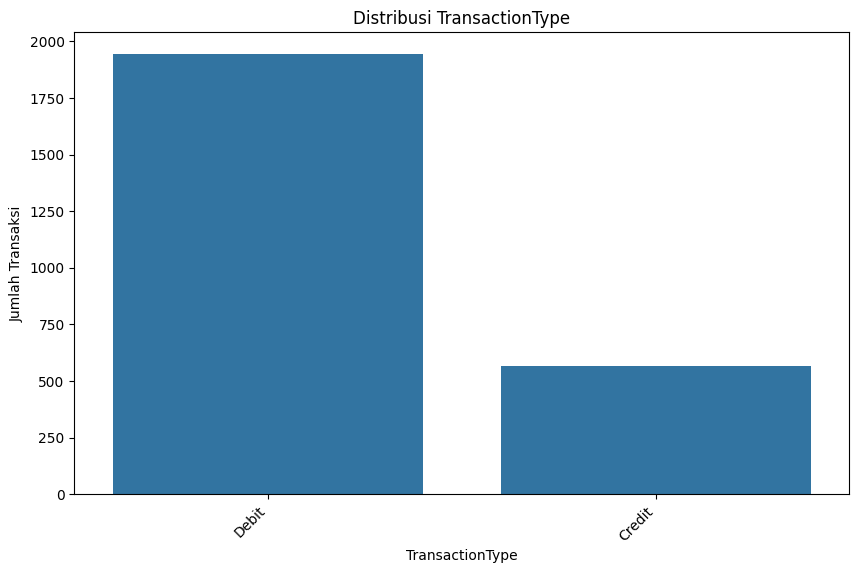

In [5]:
# Visualisasi distribusi kolom 'TransactionType'
plt.figure(figsize=(10, 6))
sns.countplot(x='TransactionType', data=df)
plt.title('Distribusi TransactionType')
plt.xlabel('TransactionType')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right') # Rotasi label sumbu x agar lebih mudah dibaca
plt.show()


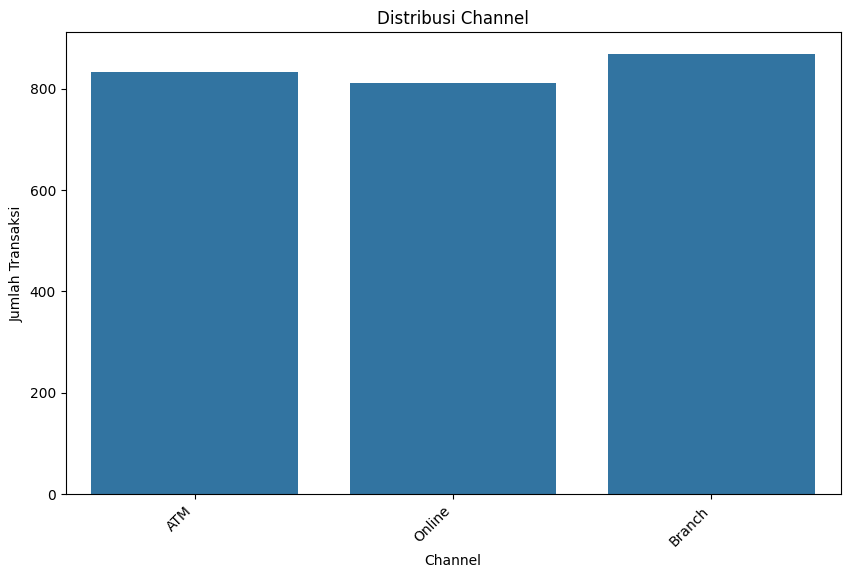

In [6]:
# Visualisasi distribusi kolom 'Channel'
plt.figure(figsize=(10, 6))
sns.countplot(x='Channel', data=df)
plt.title('Distribusi Channel')
plt.xlabel('Channel')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right') # Rotasi label sumbu x agar lebih mudah dibaca
plt.show()


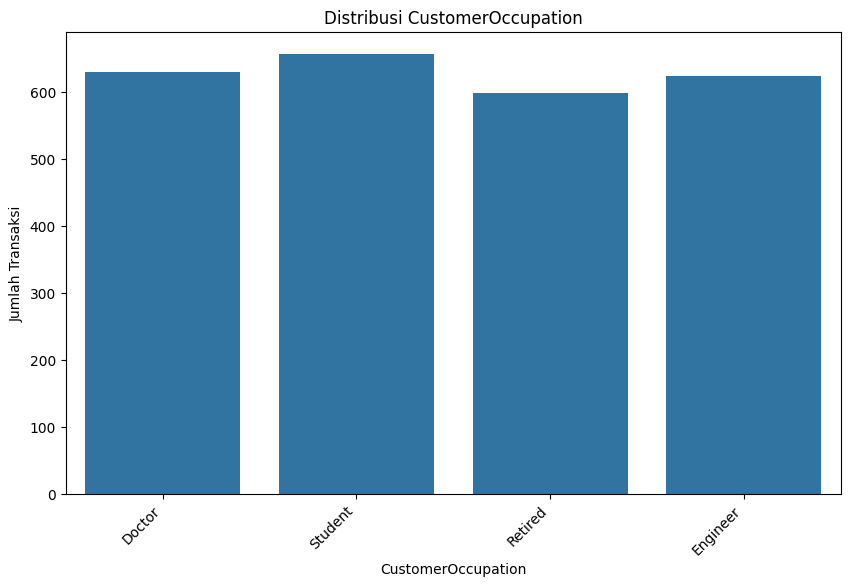

In [7]:
# Visualisasi distribusi kolom 'CustomerOccupation'
plt.figure(figsize=(10, 6))
sns.countplot(x='CustomerOccupation', data=df)
plt.title('Distribusi CustomerOccupation')
plt.xlabel('CustomerOccupation')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right') # Rotasi label sumbu x agar lebih mudah dibaca
plt.show()


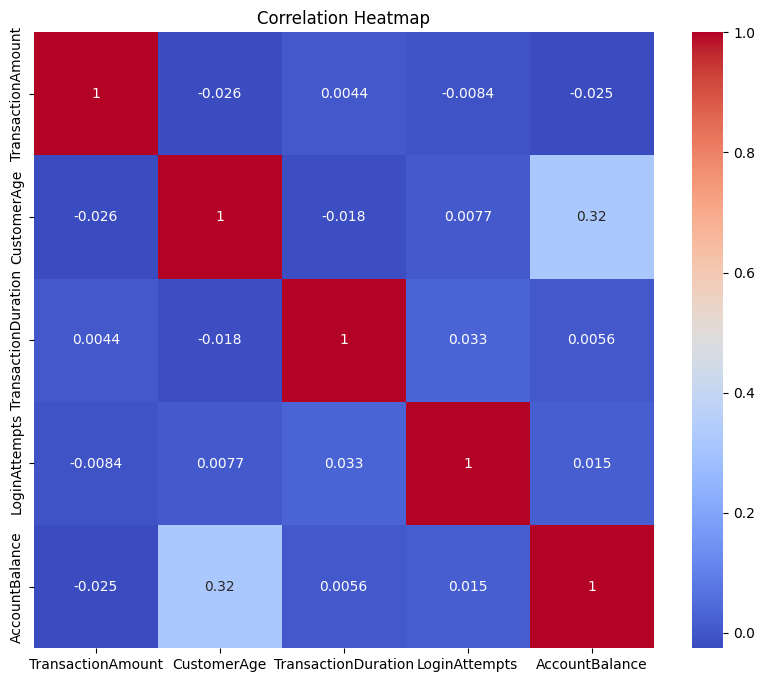

In [ ]:
# heatmap korelasi untuk fitur numerik
plt.figure(figsize=(10, 8))
correlation_matrix = num_features.corr()
sns.heatmap(num_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

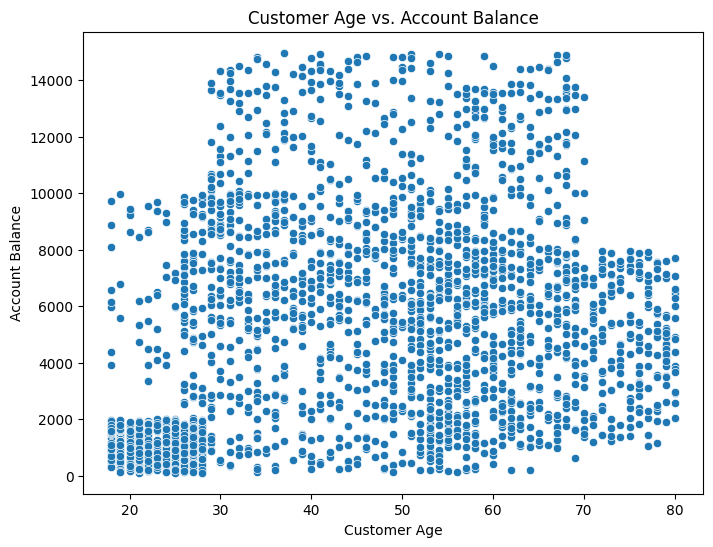

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CustomerAge', y='AccountBalance', data=df)
plt.title('Customer Age vs. Account Balance')
plt.xlabel('Customer Age')
plt.ylabel('Account Balance')
plt.show()

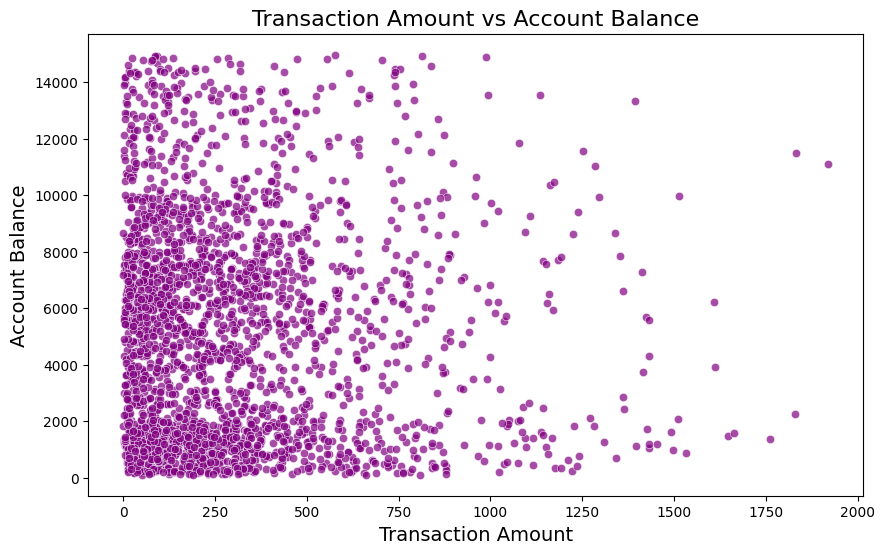

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TransactionAmount', y='AccountBalance', data=df, alpha=0.7, color='purple')
plt.title('Transaction Amount vs Account Balance', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.show()

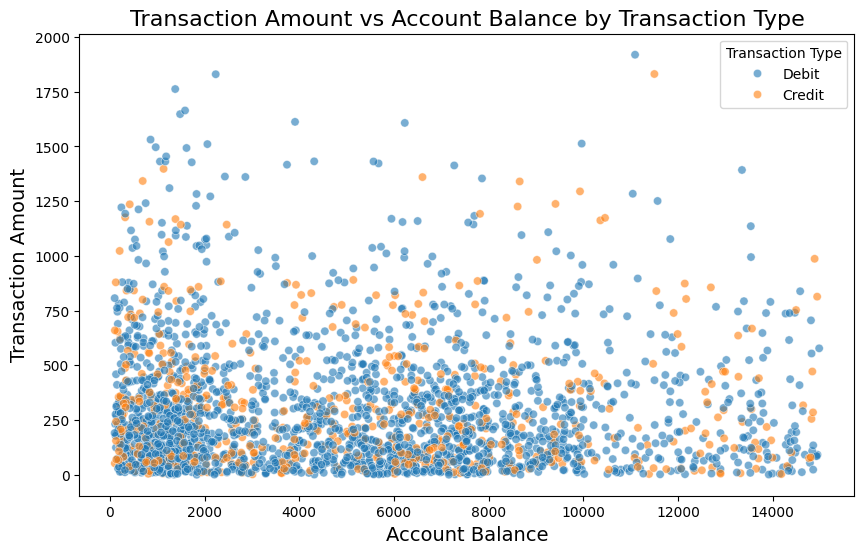

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AccountBalance', y='TransactionAmount', hue='TransactionType', data=df, alpha=0.6)
plt.title('Transaction Amount vs Account Balance by Transaction Type', fontsize=16)
plt.xlabel('Account Balance', fontsize=14)
plt.ylabel('Transaction Amount', fontsize=14)
plt.legend(title='Transaction Type')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Mengubah tioe data kolom

In [ ]:
# mengubah tipe data kolom menjadi datetime
datetime_columns = ["TransactionDate", "PreviousTransactionDate"]

for column in datetime_columns:
    df[column] = pd.to_datetime(df[column])


Deteksi Outlier

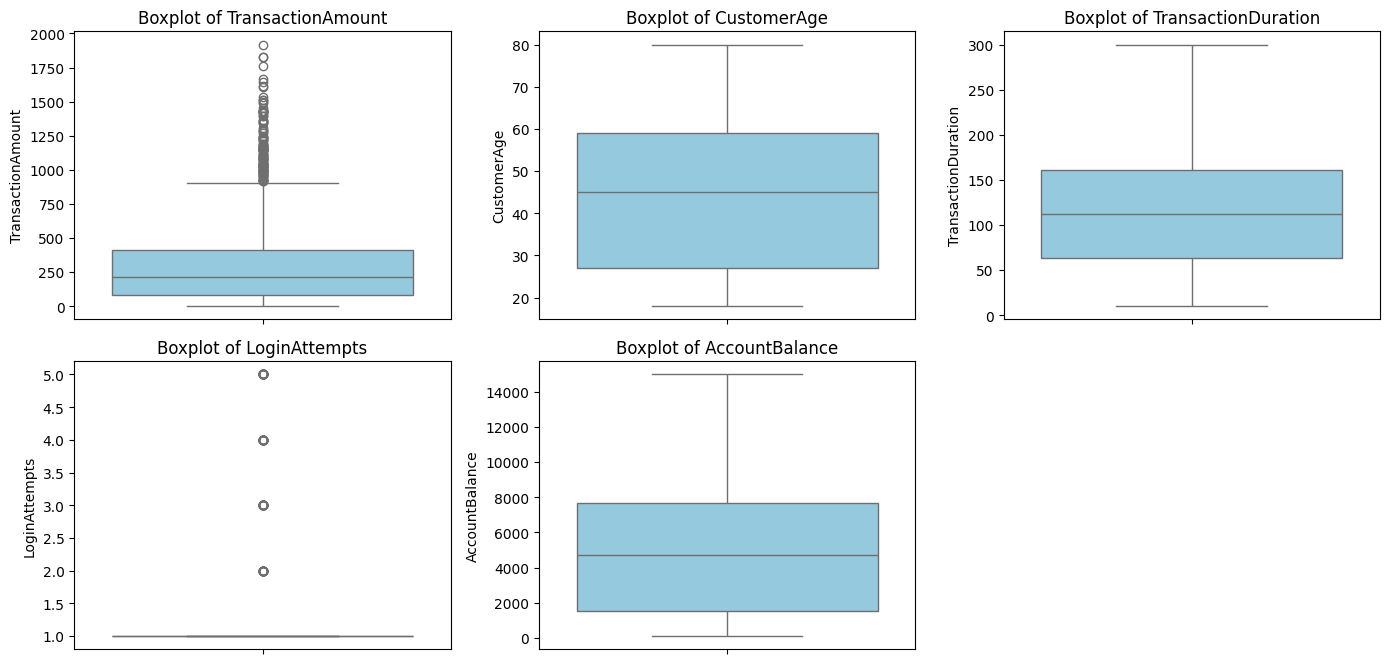

In [ ]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column, color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


In [ ]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Identifying outliers in each numerical column
outliers_summary = {}
for col in num_features:
    outliers = detect_outliers(df, col)
    outliers_summary[col] = len(outliers)

outliers_summary

{'TransactionAmount': 113,
 'CustomerAge': 0,
 'TransactionDuration': 0,
 'LoginAttempts': 122,
 'AccountBalance': 0}

Normalisasi fitur

In [ ]:
scaler = RobustScaler()
X = df[num_features.columns]
X_scaled = scaler.fit_transform(X)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
k_means = KMeans(n_clusters=3, random_state=42)
model_kmeans = k_means.fit(X_scaled)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
labels = model_kmeans.labels_
silhouette_avg = silhouette_score(X_scaled, labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.21478569304640754


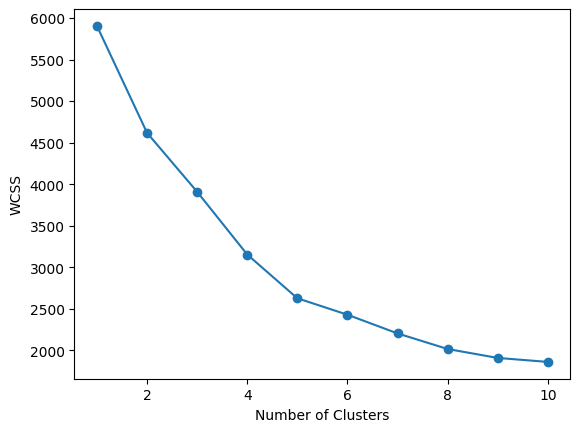

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Feature Engineering
df['AmountToBalanceRatio'] = df['TransactionAmount'] / (df['AccountBalance'] + 1e-9)  # Prevent division by zero
df['AmountPerLogin'] = df['TransactionAmount'] / (df['LoginAttempts'] + 1e-9)
df['TransactionHour'] = df['TransactionDate'].dt.hour  # Extract hour
df['TimeOfDay'] = pd.cut(df['TransactionHour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
df['TimeOfDay'] = df['TimeOfDay'].cat.codes  # Encode TimeOfDay as numeric

# Memilih fitur
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
            'AccountBalance', 'LoginAttempts', 'AmountToBalanceRatio',
            'AmountPerLogin', 'TransactionHour', 'TimeOfDay']
X = df[features]

- **AmountToBalanceRation** : Menghitung rasio antara jumlah transaksi dan saldo akun. Fraud transaction biasanya punya rasio tinggi (misalnya transaksi besar di akun dengan saldo kecil)

- **AmountPerLogin** : Menghitung rata-rata jumlah transaksi per login. Kalau ada user dengan banyak login tapi hanya 1 transaksi besar, bisa jadi indikasi fraud.

- **TransactionHour** : Mengesktrak jam transaksi dari TransactionDate

- **TimeOfDay** : Mengelompokkan jam transaksi ke dalam 4 kategori waktu:
  - 0-6 = malam
  - 6-12 = pagi
  - 12-18 = siang
  - 18-24 = malam


In [ ]:
# Standarisasi
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Mengurangi dimensi dari fitur
pca = PCA(n_components=3)  # Reduce dimensions for clustering
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Memilih jumlah k cluster menggunakan silhouette analysis
cluster_range = range(2, 10)
silhouette_scores = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil_score = silhouette_score(X_pca, labels)
    silhouette_scores.append(sil_score)

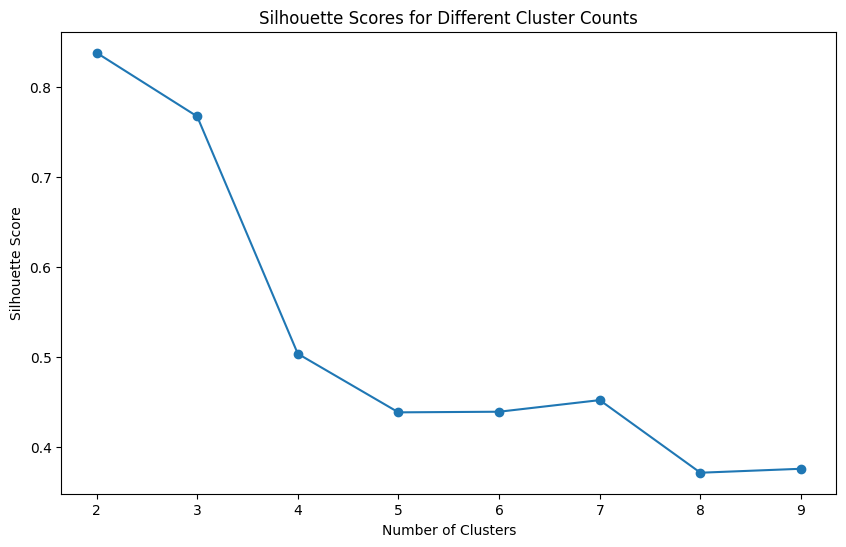

In [ ]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=20, max_iter=300, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
df['KMeans_Cluster'] = kmeans_labels


In [ ]:
# Evaluasi Clustering
sil_score = silhouette_score(X_pca, kmeans_labels)
print(f"Optimal K-Means Silhouette Score: {sil_score:.2f}")

Optimal K-Means Silhouette Score: 0.84


In [ ]:
# Deteksi Anomali (Dynamic Threshold)
distances = np.linalg.norm(X_pca - kmeans.cluster_centers_[kmeans_labels], axis=1)
mean_distance = distances.mean()
std_distance = distances.std()
threshold = mean_distance + 2 * std_distance  # Poin di luar 2 deviasi standar
df['Potential_Fraud'] = distances > threshold

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

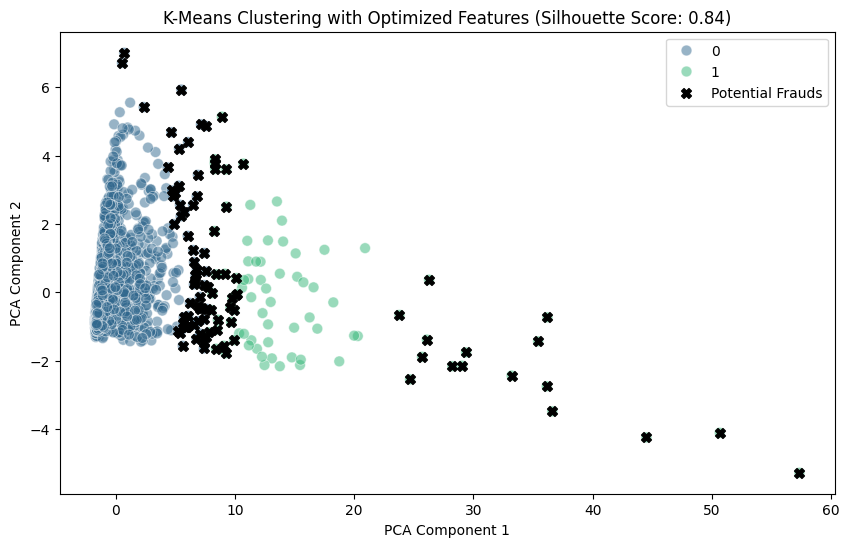

Number of potential frauds detected (K-Means): 98


In [ ]:
pca_2d = PCA(n_components=2)
reduced_data = pca_2d.fit_transform(X_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(reduced_data[distances > threshold, 0], reduced_data[distances > threshold, 1],
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title(f'K-Means Clustering with Optimized Features (Silhouette Score: {sil_score:.2f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


# Step 10: Output Results
frauds = df[df['Potential_Fraud']]
print(f"Number of potential frauds detected (K-Means): {len(frauds)}")


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=[f'Feature_{i}' for i in range(X_scaled.shape[1])]) # Creating DataFrame from X_scaled, assign generic column names
X_scaled_df['Cluster'] = model_kmeans.labels_

In [ ]:
# Misal fitur yang digunakan adalah fitur dari list 'features'
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Lakukan inverse transform untuk mengembalikan data ke skala aslinya
X_inverse = scaler.inverse_transform(X_scaled_df)
X_inverse_df = pd.DataFrame(X_inverse, columns=features)

In [ ]:
# Buat salinan dari dataset asli (jika ingin menyimpan data asli)
df_inverse = df.copy()

# Gantikan kolom-kolom yang telah di-scale dengan nilai aslinya (hasil inverse transform)
df_inverse[features] = X_inverse_df

# Cek beberapa baris hasilnya
print(df_inverse.head())


  TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  ...  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM  ...   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM  ...   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online  ...   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online  ...   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online  ...   

   TransactionDuration LoginAttempts  AccountBalance  PreviousTransactionDate  \
0                 81.0 

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
X_inverse = scaler.inverse_transform(X_scaled)
df_inverse = pd.DataFrame(X_inverse, columns=X.columns)
print(df_inverse.head())

   TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
0              14.09         70.0                 81.0         5112.21   
1             376.24         68.0                141.0        13758.91   
2             126.29         19.0                 56.0         1122.35   
3             184.50         26.0                 25.0         8569.06   
4              13.45         26.0                198.0         7429.40   

   LoginAttempts  AmountToBalanceRatio  AmountPerLogin  TransactionHour  \
0            1.0              0.002756           14.09             16.0   
1            1.0              0.027345          376.24             16.0   
2            1.0              0.112523          126.29             18.0   
3            1.0              0.021531          184.50             16.0   
4            1.0              0.001810           13.45             17.0   

   TimeOfDay  
0        2.0  
1        2.0  
2        2.0  
3        2.0  
4        2.0  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Filter data untuk cluster 0
cluster_0_data = df[df['KMeans_Cluster'] == 0]

# Hitung statistik deskriptif untuk cluster 0
cluster_0_summary = cluster_0_data[features].agg(['mean', 'median', 'std', 'min', 'max'])

# Tampilkan statistik deskriptif untuk cluster 0
print("Statistik Deskriptif untuk Cluster 0:")
print(cluster_0_summary)

Statistik Deskriptif untuk Cluster 0:
        TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
mean           282.180157    45.240825           119.471753     5284.284569   
median         200.190000    46.000000           112.000000     5058.830000   
std            276.600662    17.723623            69.819163     3863.443827   
min              0.260000    18.000000            10.000000      105.010000   
max           1919.110000    80.000000           300.000000    14977.990000   

        LoginAttempts  AmountToBalanceRatio  AmountPerLogin  TransactionHour  \
mean         1.126186              0.123331      273.142622        16.628866   
median       1.000000              0.049091      188.610000        16.000000   
std          0.605049              0.196891      275.465732         0.731758   
min          1.000000              0.000045        0.260000        16.000000   
max          5.000000              1.220463     1919.109998        18.000000   

      

In [ ]:
# Filter data untuk cluster 1
cluster_1_data = df[df['KMeans_Cluster'] == 1]

# Hitung statistik deskriptif untuk cluster 1
cluster_1_summary = cluster_1_data[features].agg(['mean', 'median', 'std', 'min', 'max'])

# Tampilkan statistik deskriptif untuk cluster 1
print("Statistik Deskriptif untuk Cluster 1:")
print(cluster_1_summary)

Statistik Deskriptif untuk Cluster 1:
        TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
mean           727.226322    28.873563           124.425287      376.310000   
median         684.960000    25.000000           120.000000      300.870000   
std            372.435697    11.281601            74.145619      276.477087   
min            177.940000    18.000000            11.000000      101.250000   
max           1762.280000    64.000000           289.000000     1380.340000   

        LoginAttempts  AmountToBalanceRatio  AmountPerLogin  TransactionHour  \
mean         1.080460              2.337431      703.209005        16.551724   
median       1.000000              1.855411      659.709999        16.000000   
std          0.533056              1.330352      363.944463         0.711347   
min          1.000000              1.221471      177.940000        16.000000   
max          5.000000              7.895988     1762.279998        18.000000   

      

####Hasil Interpretasi:
**1. Cluster 0 didapatkan karena:**

- TransactionAmount memiliki rata-rata 282.18 dengan batas minimum 0.26 dan batas maksimum 1919.11, yang menunjukkan bahwa nilai transaksi di klaster ini berada pada kisaran menengah dan cenderung tidak ekstrem.

- AccountBalance memiliki rata-rata 5284.28 dengan batas minimum 105.01 dan batas maksimum 14977.99, sehingga sebagian besar transaksi di klaster ini ditopang oleh saldo akun yang relatif tinggi.

- LoginAttempts memiliki rata-rata 1.13, yang menandakan mayoritas transaksi hanya memerlukan satu kali login dan tidak menunjukkan aktivitas mencurigakan seperti login berulang.

- AmountToBalanceRatio memiliki rata-rata 0.1233, menunjukkan bahwa nilai transaksi umumnya hanya sebagian kecil dari saldo akun (perilaku keuangan yang seimbang).

- TimeOfDay menunjukkan modus kategori 2 (Afternoon), artinya transaksi terbanyak dilakukan pada waktu sore hari, jam operasional yang wajar.

**2. Cluster 1 didapatkan karena:**

- TransactionAmount memiliki rata-rata 727.23 dengan batas minimum 177.94 dan batas maksimum 1762.28, yang menandakan nilai transaksi di klaster ini relatif tinggi dibandingkan klaster lainnya.

- AccountBalance memiliki rata-rata 376.31 dengan batas minimum 101.25 dan batas maksimum 1380.34, menunjukkan bahwa pelanggan umumnya memiliki saldo akun yang lebih rendah meskipun transaksi bernilai cukup besar.

- AmountToBalanceRatio memiliki rata-rata 2.34, dengan nilai maksimum hingga 7.90. Hal ini berarti nilai transaksi bisa mencapai lebih dari dua kali lipat saldo akun, yang mengindikasikan potensi perilaku berisiko atau anomali.

- LoginAttempts memiliki rata-rata 1.08, sehingga transaksi tidak memerlukan login berulang secara mencurigakan, tetapi rasio transaksi terhadap saldo tetap tinggi.
-
TimeOfDay menunjukkan modus kategori 2 (Afternoon), artinya transaksi terbanyak masih terjadi pada sore hari, meski dengan perilaku finansial yang tidak seimbang.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata AmountToBalanceRatio:** 0.123331    
- **Analisis:** Cluster 0 mengindikasikan pola transaksi yang normal. Pelanggan dalam cluster ini memiliki aktivitas transaksi yang moderat, dengan nilai transaksi yang relatif kecil dibandingkan dengan saldo akun yang cukup tinggi. Proses transaksi berlangsung cepat dan stabil, serta login hanya dilakukan satu kali. Transaksi dilakukan pada waktu yang wajar (sore hari), dan rasio transaksi terhadap saldo menunjukkan perilaku keuangan yang seimbang.

## Cluster 1:
- **Rata-rata AmountToBalanceRatio:** 2.337431  
- **Analisis:** Cluster 1 dapat diinterpretasikan sebagai kelompok dengan risiko tinggi karena aktivitas transaksi yang tidak seimbang. Aktivitas ini membutuhkan perhatian lebih lanjut, misalnya dengan investigasi mendalam terhadap transaksi-transaksi yang terjadi pada cluster ini, untuk memastikan apakah benar merupakan aktivitas fraud atau hanya perilaku berisiko tinggi dari segi keuangan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
from google.colab import files
df.to_csv('df_all_features.csv', index=False)
files.download('df_all_features.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-